Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.

Nivell 1
- Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    * Una variable categòrica (UniqueCarrier)
    * Una variable numèrica (ArrDelay)
    * Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    * Dues variables numèriques (ArrDelay i DepDelay)
    * Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    * Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

- Exercici 2
Exporta els gràfics com imatges o com html.

- Exercici 3
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 2.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds
from matplotlib import rc
import joypy

pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 100)

In [3]:
# Se importa el CSV
file = pd.read_csv('/Users/Victor/Documents/Data_Sience/S2_Estructura_de_datos_y_estructura_de_control/S02_T05_Exploracion_de_datos/DelayedFlights.csv', index_col=0, sep=',', encoding='utf8')
file

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
7009717,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
carriers = file['UniqueCarrier'].value_counts()
carriers

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

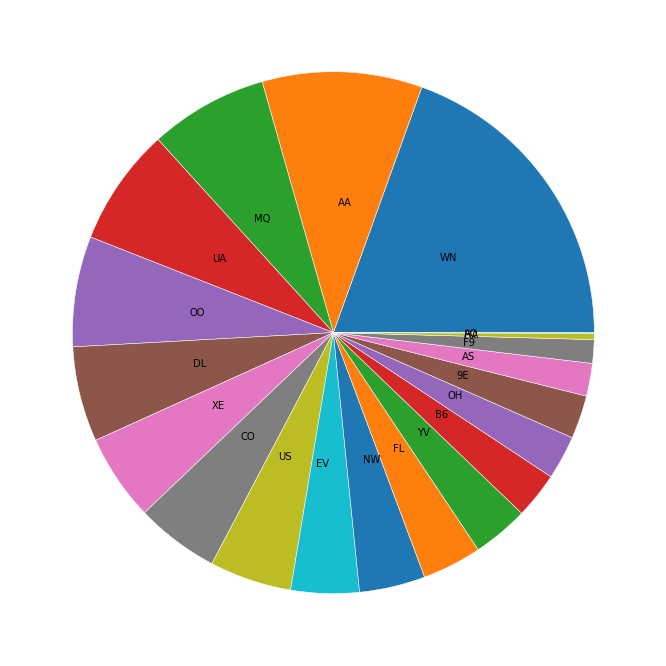

In [5]:
# Se crea un pie chart con la cantidad de vuelos por compañía para poder ver a simple 
# vista cual de ellas tiene mayor trárfico aereo. Las compañías con menos vuelos se solapan.
# Una variable categórica
plt.figure(figsize =(12, 12))
plt.pie(carriers, labels=carriers.index, labeldistance=0.5, wedgeprops = { 'linewidth' : 0.5, 'edgecolor' : 'white' })
plt.show()

Text(0, 0.5, 'Quantity')

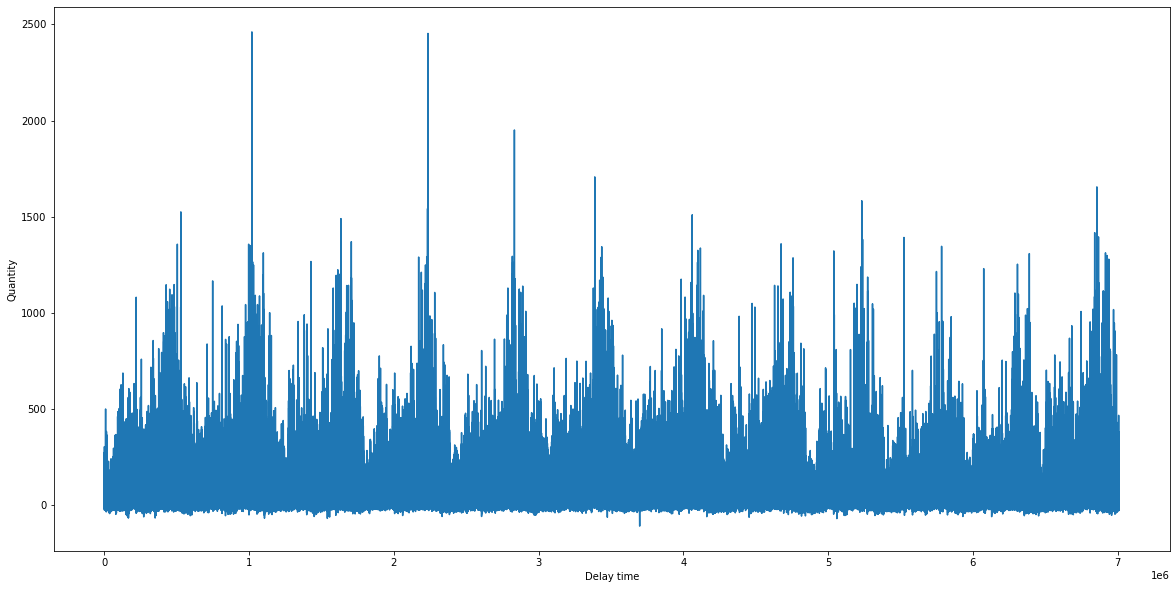

In [6]:
# Lineplot con el recuento de retrasos en el eje Y y el tiempo en el eje X
# una variable numérica

delays = file['ArrDelay']
delays

plt.figure(figsize =(20, 10))
sns.lineplot(x=delays.index, y=delays.values)
plt.xlabel('Delay time')
plt.ylabel('Quantity')

<AxesSubplot:xlabel='ArrDelay', ylabel='UniqueCarrier'>

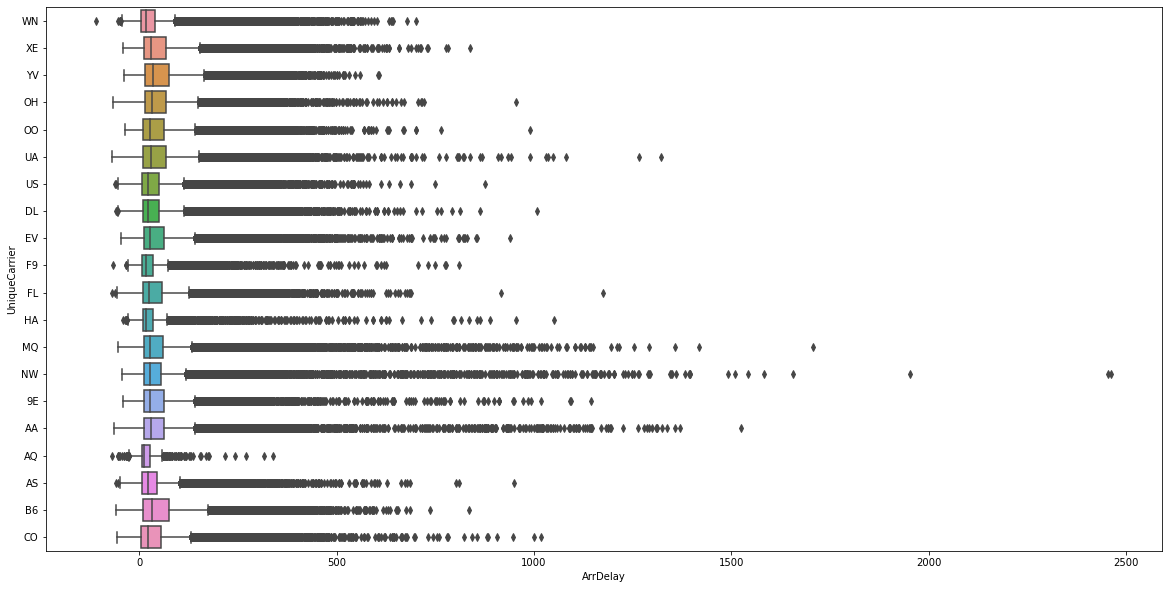

In [20]:
# Boxplot con el retraso de llegada según compañía
# Se muestra una variable numérica y otra categórica
plt.figure(figsize =(20, 10))
sns.boxplot( x=file["ArrDelay"], y=file["UniqueCarrier"] )


<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

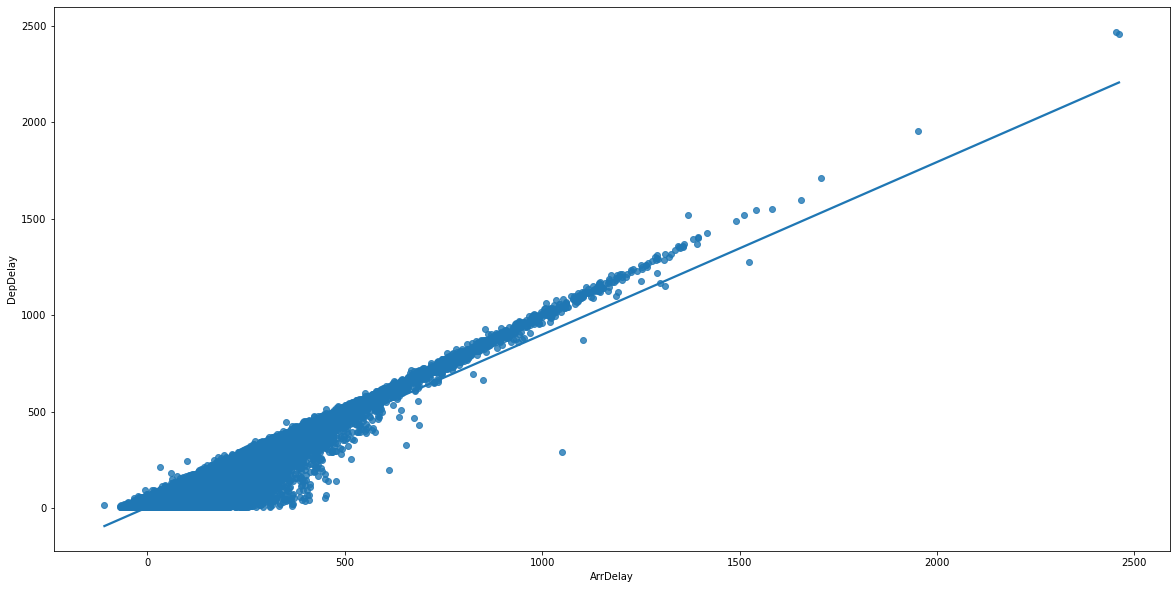

In [22]:
# Scatterplot con dos datos numéricos.
# Se pueden aplicar mejoras en la legibilidad, ya que hay mucha superposición.
plt.figure(figsize =(20, 10))
sns.regplot(x=file["ArrDelay"], y=file["DepDelay"])


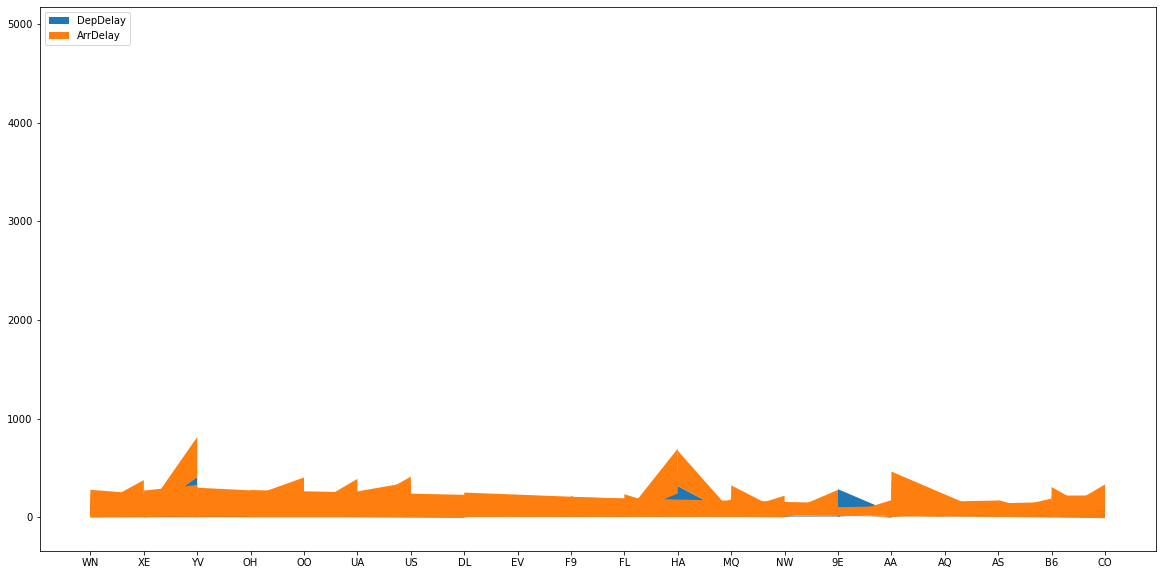

In [10]:
#Tres variables mostradas en un Stackplot
plt.figure(figsize =(20, 10))

x=file["UniqueCarrier"]
y1=file["DepDelay"]
y2=file["ArrDelay"]

plt.stackplot(x,y1, y2,labels=['DepDelay','ArrDelay'])
plt.legend(loc='upper left')

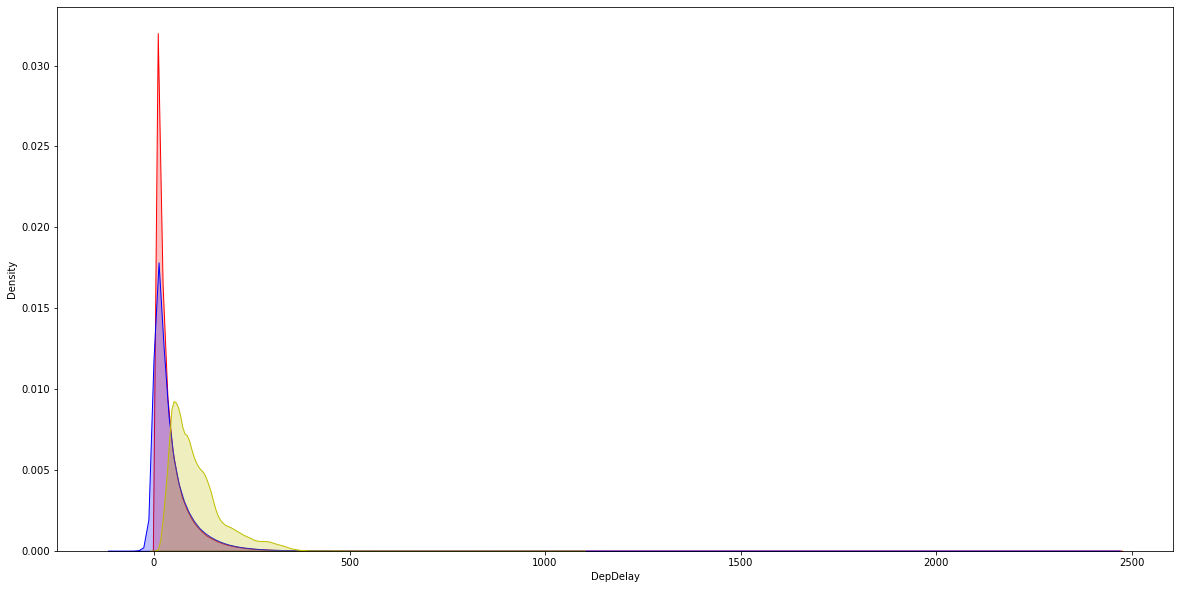

In [16]:
# Density plot con tres variables

plt.figure(figsize =(20, 10))
fig = sns.kdeplot(file['DepDelay'], shade=True, color="r")
fig = sns.kdeplot(file['ArrDelay'], shade=True, color="b")
fig = sns.kdeplot(file['AirTime'], shade=True, color="y")
plt.show()

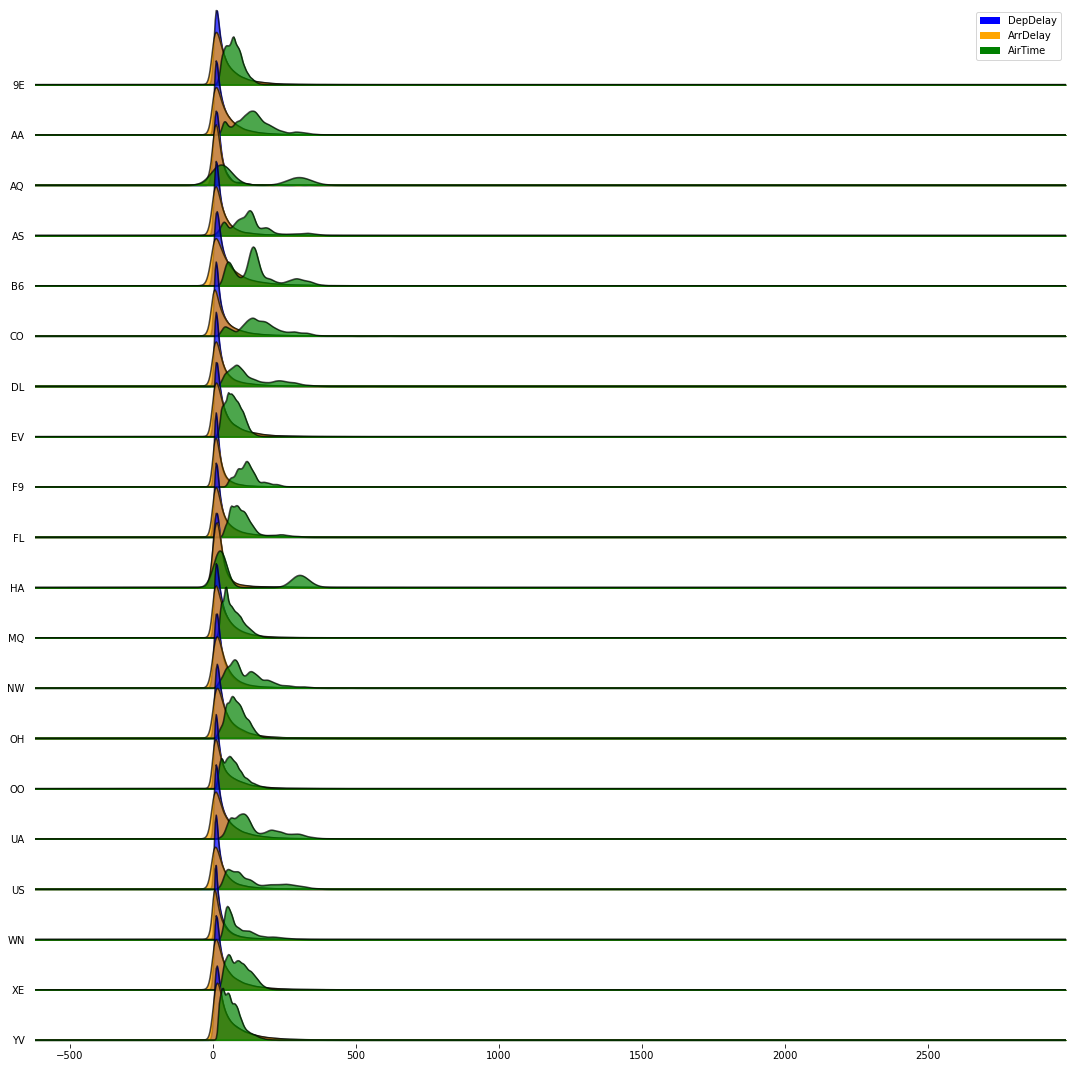

In [13]:
# Se obtienen los datos creando un nuevo DF y quitando los valores nulos y se muestran en un ridgeline
data = file[["UniqueCarrier", "DepDelay", "ArrDelay", "AirTime"]].copy()
data.dropna(inplace=True)

fig, axes = joypy.joyplot(data=data, column=['DepDelay', 'ArrDelay', 'AirTime'], by="UniqueCarrier", 
                          ylim='own', figsize=(15, 15), legend=True, color=['blue', 'orange', 'green'], alpha=0.7)
